In [72]:
import pandas as pd
# path = 'ames-housing-Cleand-eda.csv'
path = r"C:\Users\hutha\Documents\AXSOS\machine learning\preprocessing\ames-housing-Cleand-withoutNull.csv"
df = pd.read_csv(path)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year
0,907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,...,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006
1,527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,...,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,3,2006
2,534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,...,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,4,2007
3,528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,...,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,6,2008
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,2,2007


In [73]:
df.columns

Index(['PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley',
       'Utilities', 'Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remodeled', 'Exter Qual',
       'Exter Cond', 'Bsmt Unf Sqft', 'Total Bsmnt Sqft', 'Central Air',
       'Living Area Sqft', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom', 'Kitchen', 'Total Rooms', 'Garage Type',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Fence', 'SalePrice', 'Month', 'Year'],
      dtype='object')

In [74]:
df['Alley'].nunique()

2

In [75]:
unique_alleys = df['Alley'].unique()
print(unique_alleys)

[nan 'Pave' 'Grvl']


In [76]:
# Group by Alley type and calculate average sale price
df.groupby('Alley')['SalePrice'].mean()

Alley
Grvl    123556.908333
Pave    176945.358974
Name: SalePrice, dtype: float64

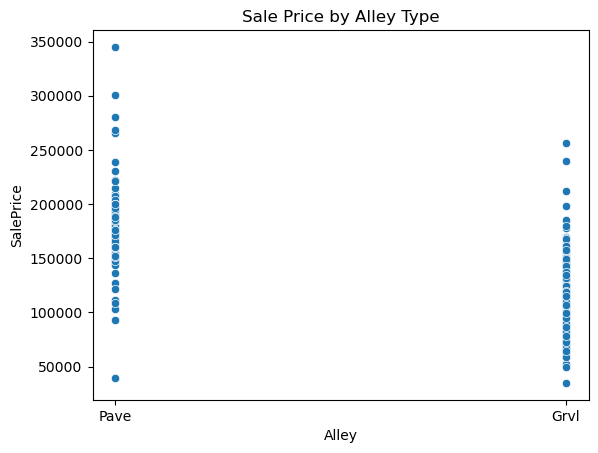

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Alley', y='SalePrice', data=df)
plt.title('Sale Price by Alley Type')
plt.show()

# Scatter best case use with numeric vs numeric 

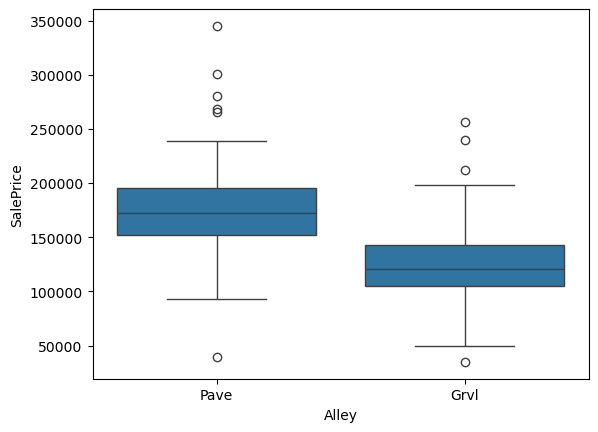

In [78]:
sns.boxplot(x='Alley', y='SalePrice', data=df)
plt.ticklabel_format(style = 'plain', axis = 'y')

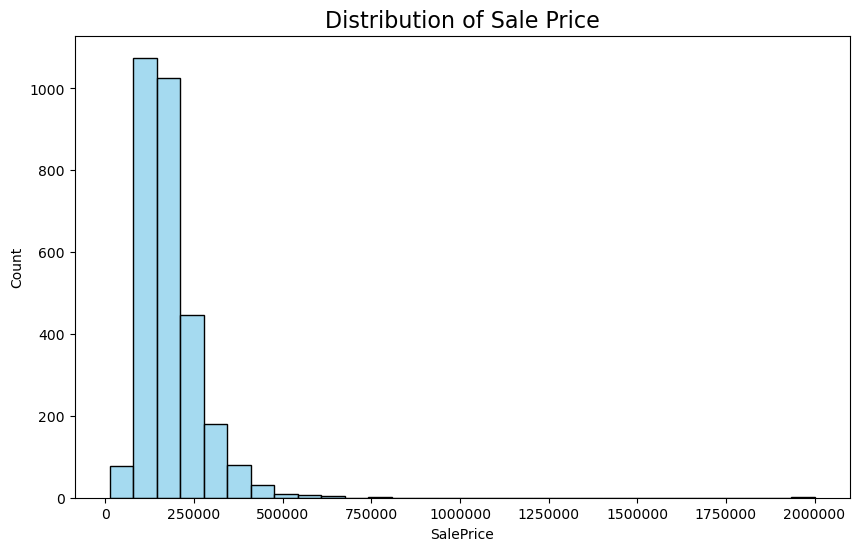

In [79]:
import os
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], bins = 30, color = 'skyblue')
plt.title("Distribution of Sale Price", fontsize = 16)
plt.ticklabel_format(style = 'plain', axis = 'x')
PLOT_DIR = r"C:\Users\hutha\Documents\AXSOS\First_Project\Plots"

# plt.savefig(os.path.join(PLOT_DIR, "hist_saleprice.png"), dpi=150, bbox_inches="tight")

In [80]:
corr = df.corr(numeric_only = True)
corr['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
Overall Qual        0.731034
Living Area Sqft    0.641210
Garage Cars         0.590018
Garage Area         0.583141
Total Bsmnt Sqft    0.578577
Year Built          0.509206
Full Bath           0.495223
Year Remodeled      0.479242
Garage Yr Blt       0.474424
Total Rooms         0.449656
Bsmt Full Bath      0.248587
Lot Area            0.241663
Lot Frontage        0.182939
Bsmt Unf Sqft       0.167499
Bedroom             0.123741
Month               0.025538
Year               -0.028140
Bsmt Half Bath     -0.035651
Overall Cond       -0.097952
Kitchen            -0.111505
PID                -0.218720
Name: SalePrice, dtype: float64

<Axes: >

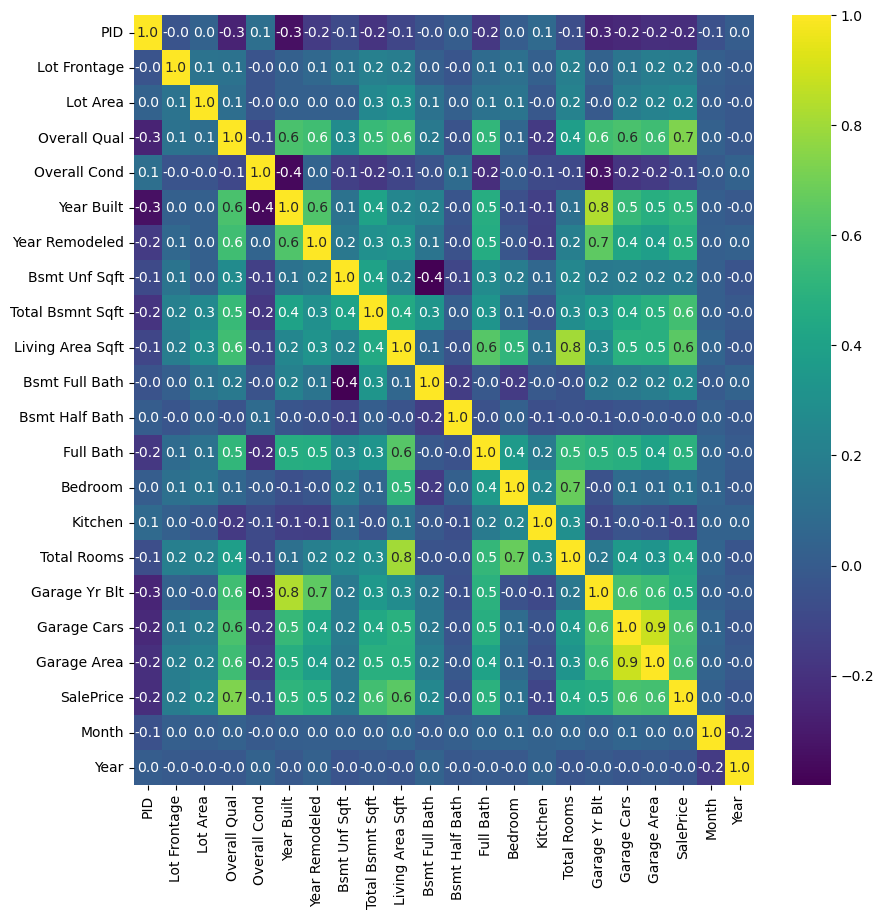

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".1f") 

# plt.savefig(os.path.join(PLOT_DIR, "heatmap_correlation.png"), dpi=150, bbox_inches="tight")


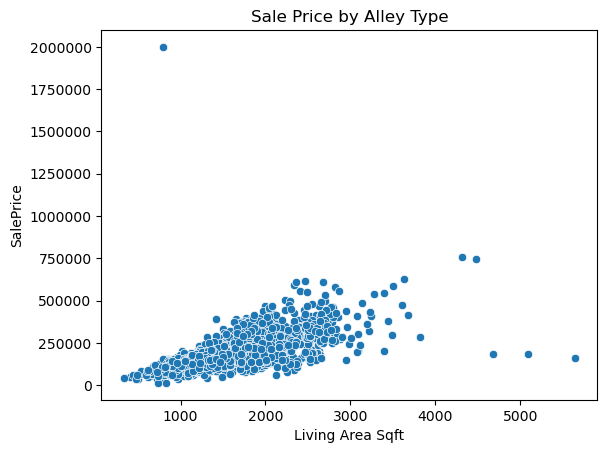

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Living Area Sqft', y='SalePrice', data=df)
plt.title('Sale Price by Alley Type')
plt.ticklabel_format(style = 'plain', axis = 'y')

In [83]:
df.columns

Index(['PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley',
       'Utilities', 'Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remodeled', 'Exter Qual',
       'Exter Cond', 'Bsmt Unf Sqft', 'Total Bsmnt Sqft', 'Central Air',
       'Living Area Sqft', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom', 'Kitchen', 'Total Rooms', 'Garage Type',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Fence', 'SalePrice', 'Month', 'Year'],
      dtype='object')

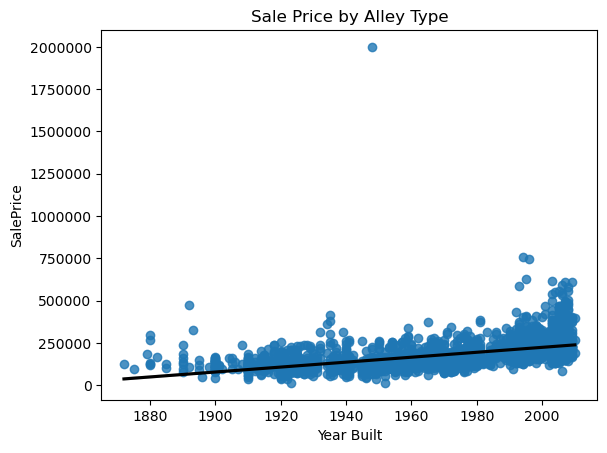

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
line_color = dict(color = 'black')
sns.regplot(x='Year Built', y='SalePrice', data=df, line_kws = line_color )
plt.title('Sale Price by Alley Type')
plt.ticklabel_format(style = 'plain', axis = 'y')
# plt.savefig(os.path.join(PLOT_DIR, 'reg_yearbuilt_saleprice.png'), dpi=150)


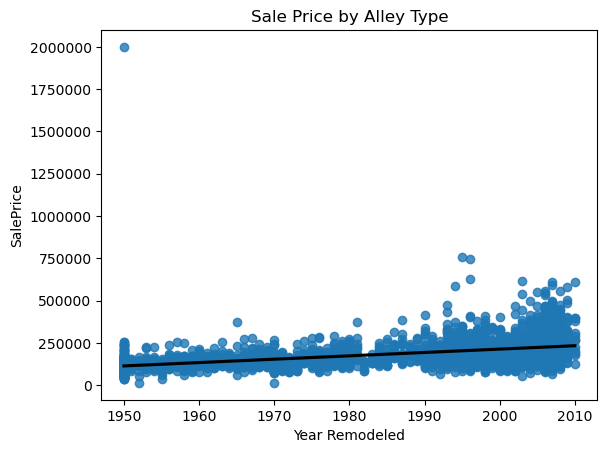

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
line_color = dict(color = 'black')

sns.regplot(x='Year Remodeled', y='SalePrice', data=df, line_kws = line_color)
plt.title('Sale Price by Alley Type')
plt.ticklabel_format(style = 'plain', axis = 'y')
# plt.savefig(os.path.join(PLOT_DIR, 'reg_yearremodeled_saleprice.png'), dpi=150)


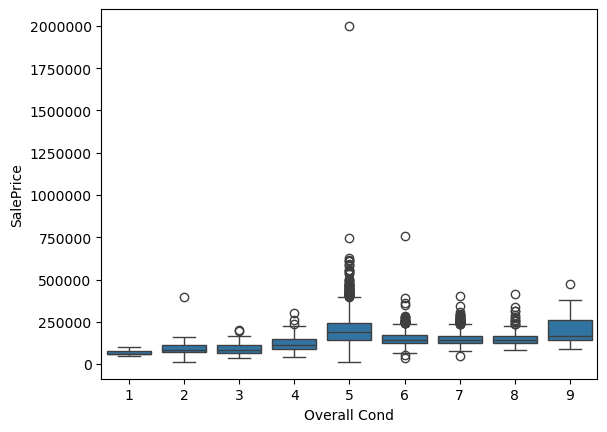

In [86]:

sns.boxplot(x='Overall Cond', y='SalePrice', data = df)
plt.ticklabel_format(style = 'plain', axis = 'y')

In [87]:
df.groupby('Neighborhood') ['SalePrice'].median().sort_values()

Neighborhood
MeadowV     88250.0
BrDale     106000.0
IDOTRR     106500.0
OldTown    120000.0
Edwards    125000.0
BrkSide    126750.0
Blueste    130500.0
Sawyer     135000.0
SWISU      136200.0
Landmrk    137000.0
NAmes      140000.0
NPkVill    143750.0
Mitchel    153500.0
SawyerW    180000.0
NWAmes     181000.0
Gilbert    183000.0
Blmngtn    191500.0
ClearCr    197500.0
Greens     198000.0
CollgCr    200000.0
Crawfor    200624.0
Somerst    225500.0
Timber     232500.0
Veenker    250250.0
GrnHill    280000.0
NoRidge    302000.0
NridgHt    317500.0
StoneBr    319000.0
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Meadian Sale Price by Year')

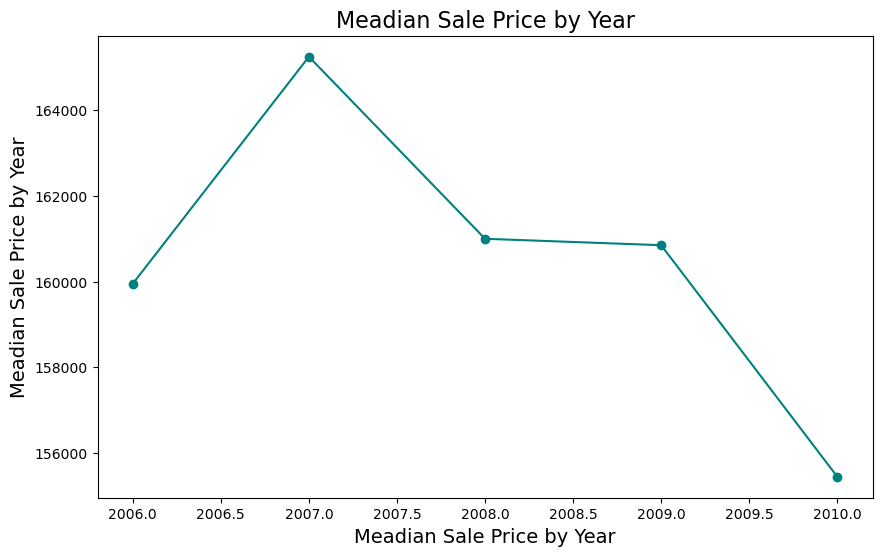

In [88]:
plt.figure(figsize = (10,6))
df.groupby('Year') ['SalePrice'].median().astype(int).plot(marker = 'o', color = 'teal')
plt.title("Meadian Sale Price by Year", fontsize = 16)
plt.xlabel("Meadian Sale Price by Year", fontsize = 14)
plt.ylabel("Meadian Sale Price by Year", fontsize = 14)
# plt.savefig(os.path.join(PLOT_DIR, "line_median_saleprice_by_year.png"), dpi=150, bbox_inches="tight")


# For future we would like to know the reasons of variation in increasing, decreasing, stable 

<Axes: xlabel='Year'>

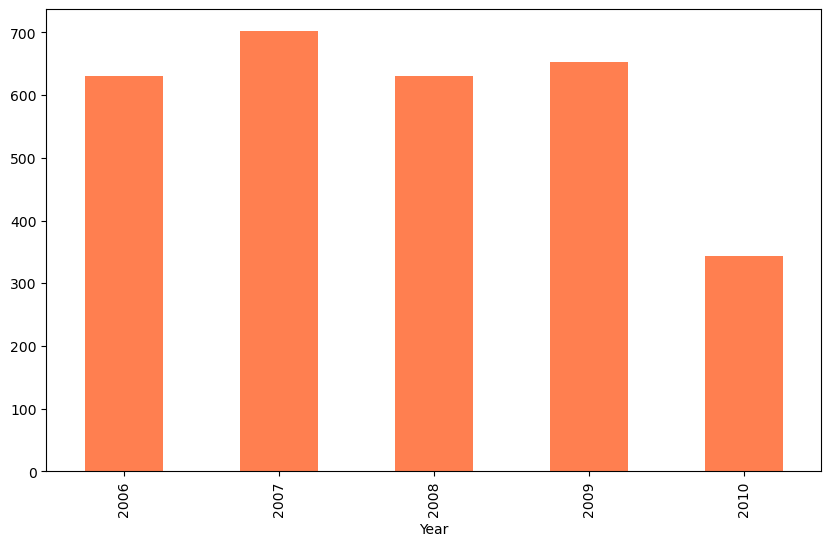

In [89]:
plt.figure(figsize= (10,6))
df['Year'].value_counts().sort_index().plot(kind = 'bar', color = 'coral')
# plt.savefig(os.path.join(PLOT_DIR, "bar_sales_by_year.png"), dpi=150, bbox_inches="tight")

# can be used with numeric vs categorical

Text(0.5, 1.0, 'Sale Price Distribution by Neighborhood')

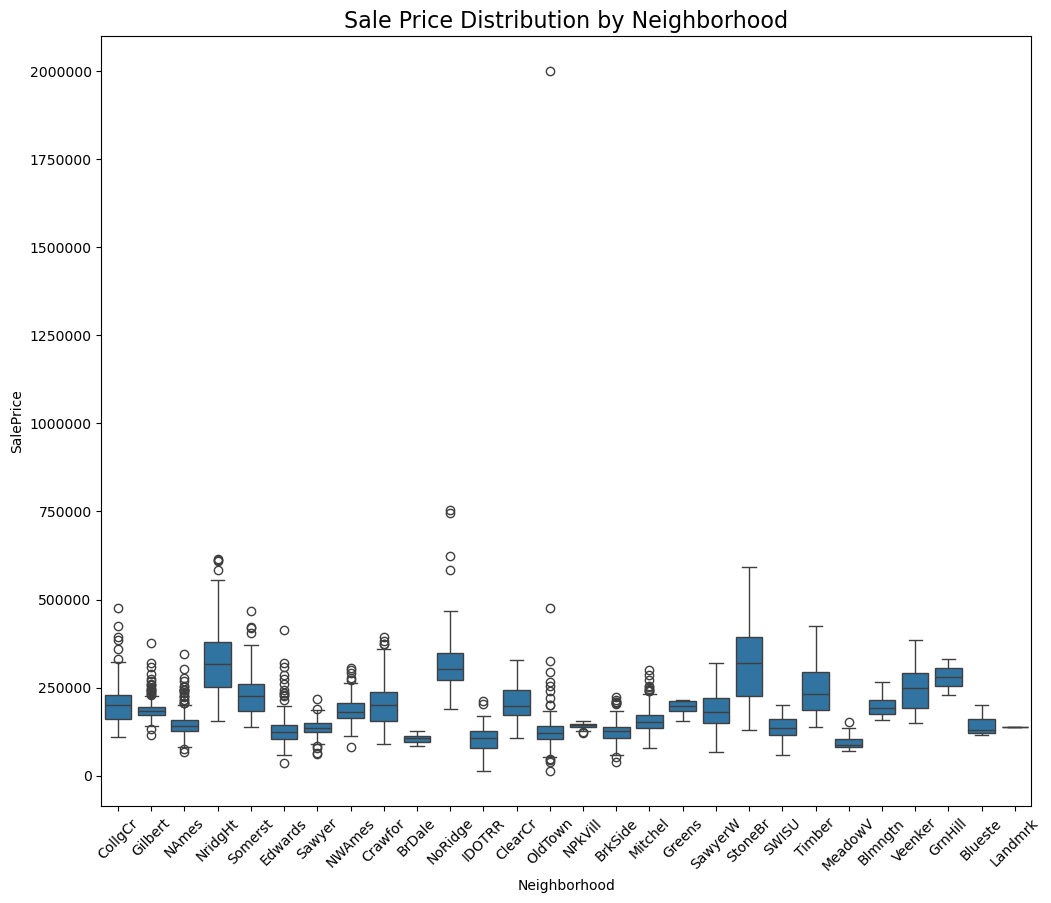

In [90]:
plt.figure (figsize= (12,10))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.title("Sale Price Distribution by Neighborhood", fontsize=16)
# plt.savefig(os.path.join(PLOT_DIR, "box_saleprice_by_neighborhood.png"), dpi=150, bbox_inches="tight")

# Can be used with 

# Part4

In [91]:
import numpy as np
from EDA_functions import *
cat_cols = df.select_dtypes('object').columns
cat_cols
num_cols = df.select_dtypes('number').columns
num_cols





Index(['PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remodeled', 'Bsmt Unf Sqft', 'Total Bsmnt Sqft',
       'Living Area Sqft', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Bedroom', 'Kitchen', 'Total Rooms', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'SalePrice', 'Month', 'Year'],
      dtype='object')

## MS Zoning

**Definition (from Ames Data Dictionary):**  
Identifies the general zoning classification of the sale.  
- A (agr): Agriculture  
- C (all): Commercial  
- FV: Floating Village Residential  
- I (all): Industrial  
- RH: Residential High Density  
- RL: Residential Low Density  
- RP: Residential Low Density Park  
- RM: Residential Medium Density


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


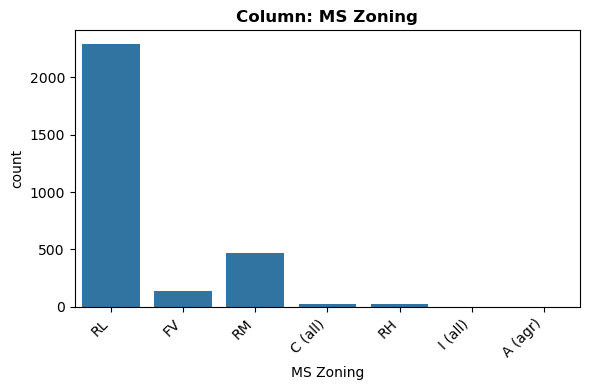

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'RL' occurs 2294 times (77.53%)
- Not constant or quasi-constant.


In [92]:
# Univariate analysis for MS Zoning
fig, ax = explore_categorical(df, 'MS Zoning')


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


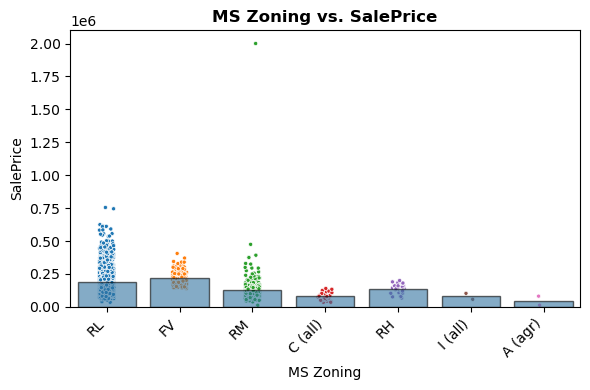

In [93]:
# Compare MS Zoning against SalePrice
fig, ax = plot_categorical_vs_target(df, 'MS Zoning', y='SalePrice')


  - RL and FV zones have higher average prices and wide variability.  
  - RM and RH zones are lower on average.  
  - C (Commercial), I (Industrial), and A (Agriculture) zones show low prices and are rare
  - RL,FV and RM show outliers

In [98]:
from IPython.display import Markdown, display

# ===== Ames Housing – Data Dictionary (for your columns) =====
DATA_DICTIONARY = {
    "PID": "Parcel identification number – unique ID.",
    "MS Zoning": ("General zoning classification of the sale: "
                  "A=Agriculture, C=Commercial, FV=Floating Village Residential, "
                  "I=Industrial, RH=Residential High Density, RL=Residential Low Density, "
                  "RP=Residential Low Density Park, RM=Residential Medium Density."),
    "Lot Frontage": "Linear feet of street connected to property.",
    "Lot Area": "Lot size in square feet.",
    "Street": "Type of road access (Grvl, Pave).",
    "Alley": "Type of alley access (Grvl, Pave, NA).",
    "Utilities": "Type of utilities available (AllPub, NoSewr, NoSeWa, ELO).",
    "Neighborhood": "Physical location within Ames city limits.",
    "Bldg Type": "Type of dwelling (1Fam, 2FmCon, Duplx, TwnhsE, TwnhsI).",
    "House Style": "Style of dwelling (1Story, 2Story, 1.5Fin, 1.5Unf, etc.).",
    "Overall Qual": "Overall material and finish quality (1–10, higher is better).",
    "Overall Cond": "Overall condition rating (1–10, higher is better).",
    "Year Built": "Original construction year.",
    "Year Remodeled": "Remodel year (same as Year Built if never remodeled).",
    "Exter Qual": "Exterior material quality (Ex, Gd, TA, Fa, Po).",
    "Exter Cond": "Present condition of the material on the exterior (Ex, Gd, TA, Fa, Po).",
    "Bsmt Unf Sqft": "Unfinished basement square feet.",
    "Total Bsmnt Sqft": "Total basement area in square feet.",
    "Central Air": "Central air conditioning (Y/N).",
    "Living Area Sqft": "Above ground living area (Gr Liv Area) in square feet.",
    "Bsmt Full Bath": "Basement full bathrooms.",
    "Bsmt Half Bath": "Basement half bathrooms.",
    "Full Bath": "Full bathrooms above grade.",
    "Half Bath": "Half bathrooms above grade.",
    "Bedroom": "Bedrooms above basement level.",
    "Kitchen": "Kitchens above grade.",
    "Total Rooms": "Total rooms above grade (excludes bathrooms).",
    "Garage Type": "Garage location (2Types, Attchd, Basment, BuiltIn, CarPort, Detchd).",
    "Garage Yr Blt": "Year garage was built.",
    "Garage Cars": "Garage capacity in car count.",
    "Garage Area": "Garage size in square feet.",
    "Garage Qual": "Garage quality (Ex, Gd, TA, Fa, Po).",
    "Garage Cond": "Garage condition (Ex, Gd, TA, Fa, Po).",
    "Paved Drive": "Paved driveway (Y, P, N).",
    "Fence": "Fence quality (GdPrv, MnPrv, GdWo, MnWw, NA).",
    "SalePrice": "Sale price in USD (target variable).",
    "Month": "Month of sale (1–12).",
    "Year": "Year of sale."
}

# ===== Optional: known ordinals and category orders (for nicer plots) =====
ORDINAL_CANDIDATES = {
    "Exter Qual": ['Po','Fa','TA','Gd','Ex'],
    "Exter Cond": ['Po','Fa','TA','Gd','Ex'],
    "Garage Qual": ['Po','Fa','TA','Gd','Ex'],
    "Garage Cond": ['Po','Fa','TA','Gd','Ex'],
    "Paved Drive": ['N','P','Y'],
    "Fence": ['MnWw','GdWo','MnPrv','GdPrv']   # keep nominal if you’re unsure
}

CATEGORY_ORDERS = {
    "MS Zoning": ['A (agr)','C (all)','I (all)','RH','RM','FV','RL','RP'],  # RL often most common
    "Street": ['Grvl','Pave'],
    "Alley": ['Grvl','Pave','MISSING'],
    "Utilities": ['ELO','NoSeWa','NoSewr','AllPub'],
    "Bldg Type": ['2FmCon','Duplx','TwnhsE','TwnhsI','1Fam'],
    "Central Air": ['N','Y'],
    "Paved Drive": ['N','P','Y']
}


In [99]:
import numpy as np
import pandas as pd

def infer_feature_type(df, col):
    if pd.api.types.is_numeric_dtype(df[col]):
        return 'numeric'
    if col in ORDINAL_CANDIDATES:
        return 'ordinal'
    return 'categorical'

def is_quasi_constant(series, threshold=0.98):
    if len(series) == 0:
        return False
    vc = series.value_counts(dropna=False)
    return (vc.iloc[0] / len(series)) >= threshold

def cardinality(series):
    return series.nunique(dropna=True)

def nulls_info(series):
    n = series.isna().sum()
    p = 100 * n / len(series) if len(series) else 0.0
    return int(n), round(p, 2)

def expected_known_before_target(col):
    # Nothing in your list leaks the target; treat as known pre-sale.
    return True

def quick_predictiveness_hint(df, col, target='SalePrice'):
    if pd.api.types.is_numeric_dtype(df[col]):
        corr = df[[col, target]].corr(numeric_only=True).loc[col, target]
        return f"Numeric corr |r|≈ {abs(corr):.2f}" if pd.notna(corr) else "Numeric corr unavailable"
    g = df.groupby(col)[target].mean().sort_values()
    return "No groups" if g.empty else f"Mean(target) range ≈ {g.max()-g.min():.0f}"

def handle_null_recommendation(df, col):
    ftype = infer_feature_type(df, col)
    n, _ = nulls_info(df[col])
    if n == 0:
        return "No action (no nulls)."
    if ftype == 'numeric':
        return "Impute (median). If skew is low, mean is acceptable."
    mode_val = df[col].mode(dropna=True)
    if len(mode_val):
        return f"Impute (mode = '{mode_val.iloc[0]}'). If you prefer explicit missingness, use 'MISSING'."
    return "Impute with placeholder 'MISSING'."

def inspect_feature(df, col, target='SalePrice', figsize_uni=(6,4), figsize_bi=(6,4)):
    ftype = infer_feature_type(df, col)
    n_null, p_null = nulls_info(df[col])
    quasi = is_quasi_constant(df[col])
    card = cardinality(df[col])
    high_card = (ftype != 'numeric') and (card > 10)
    known = expected_known_before_target(col)
    null_action = handle_null_recommendation(df, col)
    hint = quick_predictiveness_hint(df, col, target=target)

    # (1) Definition header
    definition = DATA_DICTIONARY.get(col, "No definition available.")
    display(Markdown(f"## {col}\n\n**Definition:** {definition}"))

    # (2) Univariate plot
    order = CATEGORY_ORDERS.get(col, None)
    if ftype == 'numeric':
        explore_numeric(df, col, figsize=figsize_uni)
    else:
        explore_categorical(df, col, figsize=figsize_uni, order=order)

    # (3) Auto-inspection answers
    md = f"""
**Type:** {('Ordinal' if ftype=='ordinal' else 'Numeric' if ftype=='numeric' else 'Categorical (nominal)')}  
**Nulls:** {n_null} ({p_null}%)  
**Null Handling Suggestion:** {null_action}  
**Constant/Quasi-constant?** {'Yes' if quasi else 'No'}  
**Cardinality:** {card}{' (high)' if high_card else ''}  
**Known before target?** {'Yes' if known else 'No'}  
**Business-case exclusion?** None apparent.
"""
    display(Markdown(md))

    # (4) Vs-target plot
    if ftype == 'numeric':
        plot_numeric_vs_target(df, col, y=target, figsize=figsize_bi)
    else:
        plot_categorical_vs_target(df, col, y=target, figsize=figsize_bi, order=order)

    # (5) Target interpretation scaffold
    display(Markdown(f"""
### {col} – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **{hint}**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_
"""))


## PID

**Definition:** Parcel identification number – unique ID.

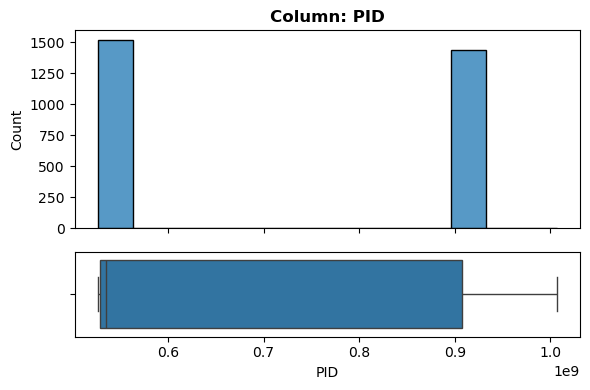

- NaN's Found: 0 (0.0%)
- Unique Values: 2930
- Most common value: '902202090' occurs 2 times (0.07%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 2930  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


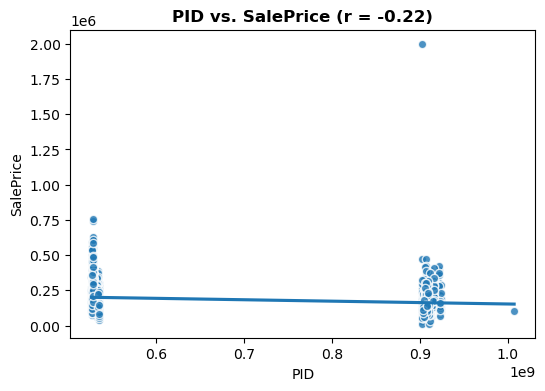


### PID – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.22**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## MS Zoning

**Definition:** General zoning classification of the sale: A=Agriculture, C=Commercial, FV=Floating Village Residential, I=Industrial, RH=Residential High Density, RL=Residential Low Density, RP=Residential Low Density Park, RM=Residential Medium Density.

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


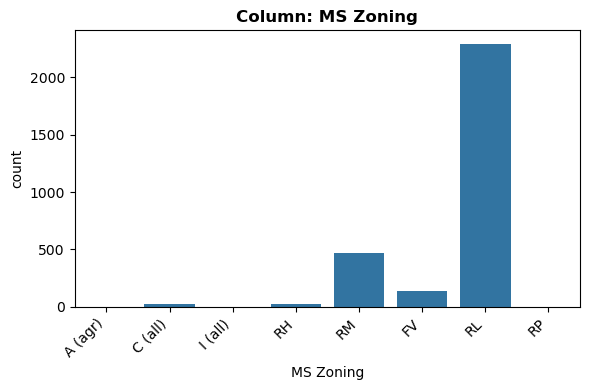

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'RL' occurs 2294 times (77.53%)
- Not constant or quasi-constant.



**Type:** Categorical (nominal)  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 7  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### MS Zoning – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 171687**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Lot Frontage

**Definition:** Linear feet of street connected to property.

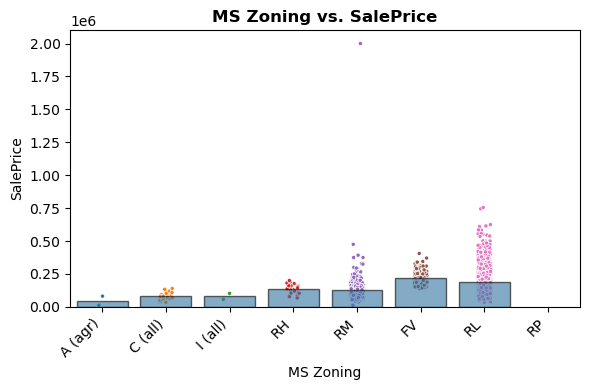

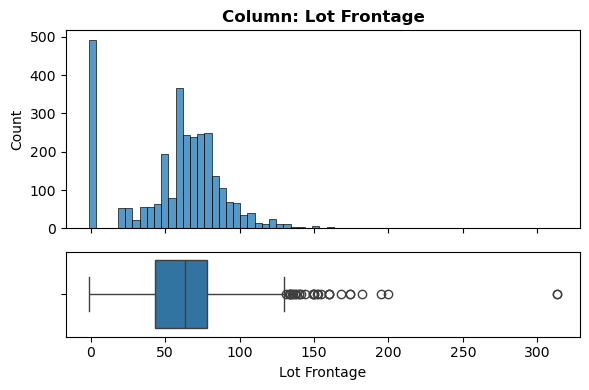

- NaN's Found: 0 (0.0%)
- Unique Values: 129
- Most common value: '-1' occurs 492 times (16.63%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 129  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


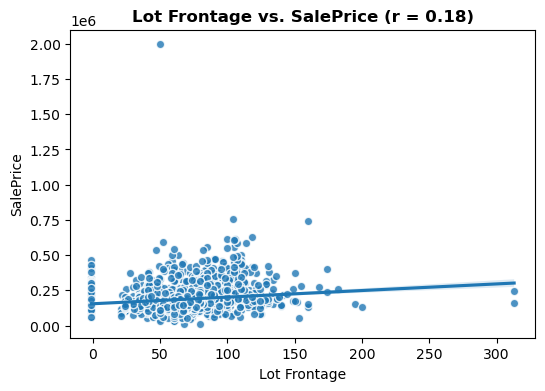


### Lot Frontage – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.18**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Lot Area

**Definition:** Lot size in square feet.

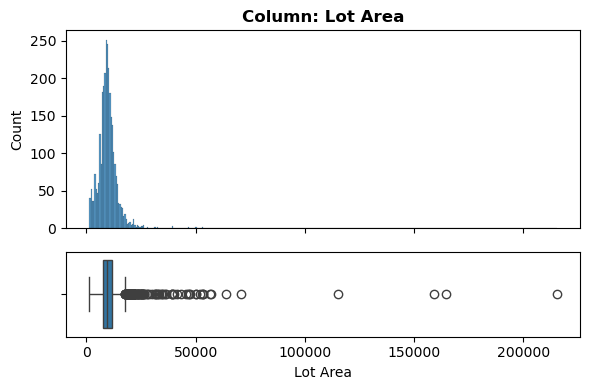

- NaN's Found: 0 (0.0%)
- Unique Values: 1960
- Most common value: '7200' occurs 44 times (1.49%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 1960  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


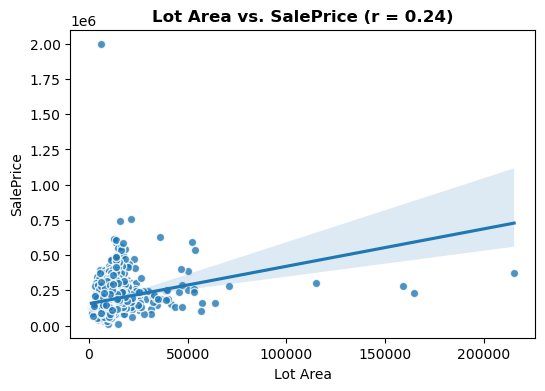


### Lot Area – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.24**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Street

**Definition:** Type of road access (Grvl, Pave).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


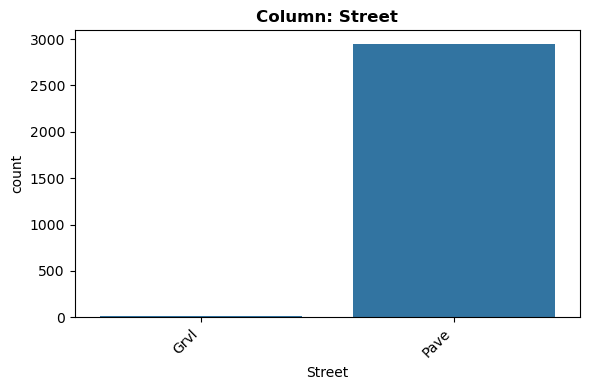

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Pave' occurs 2947 times (99.59%)

- [!] Warning: 'Street' is a constant or quasi-constant feature and should be dropped.



**Type:** Categorical (nominal)  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** Yes  
**Cardinality:** 2  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Street – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 75132**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Alley

**Definition:** Type of alley access (Grvl, Pave, NA).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


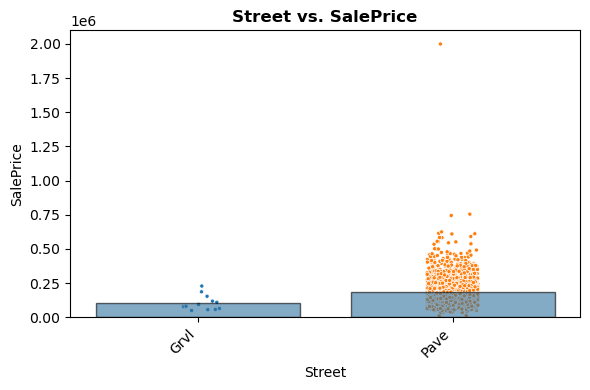

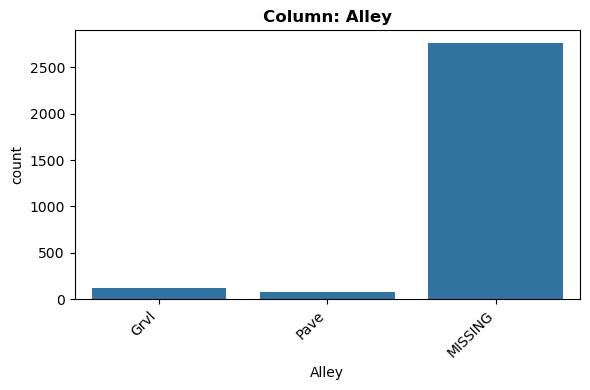

- NaN's Found: 2758 (93.21%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2758 times (93.21%)
- Not constant or quasi-constant.



**Type:** Categorical (nominal)  
**Nulls:** 2758 (93.21%)  
**Null Handling Suggestion:** Impute (mode = 'Grvl'). If you prefer explicit missingness, use 'MISSING'.  
**Constant/Quasi-constant?** No  
**Cardinality:** 2  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Alley – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 53388**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Utilities

**Definition:** Type of utilities available (AllPub, NoSewr, NoSeWa, ELO).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


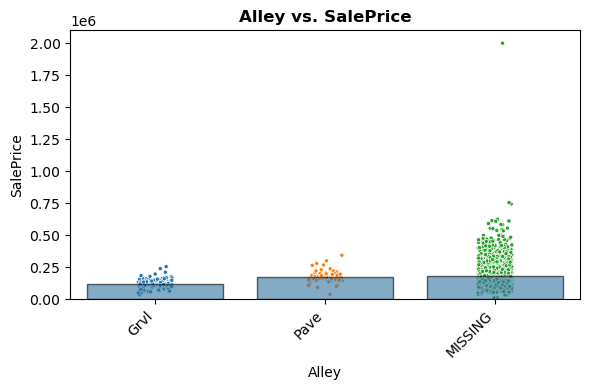

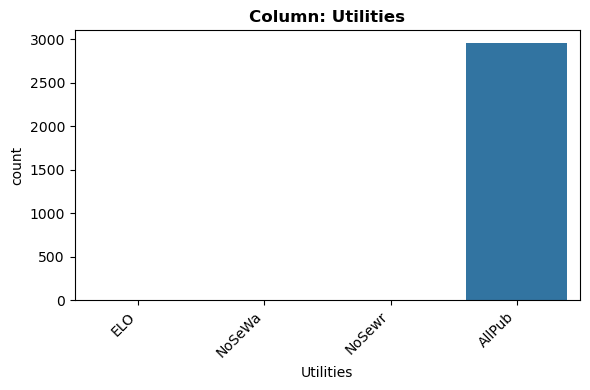

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'AllPub' occurs 2956 times (99.9%)

- [!] Warning: 'Utilities' is a constant or quasi-constant feature and should be dropped.



**Type:** Categorical (nominal)  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** Yes  
**Cardinality:** 3  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Utilities – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 95256**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Neighborhood

**Definition:** Physical location within Ames city limits.

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


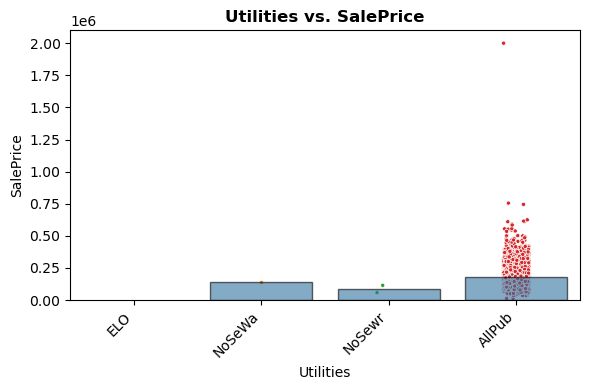

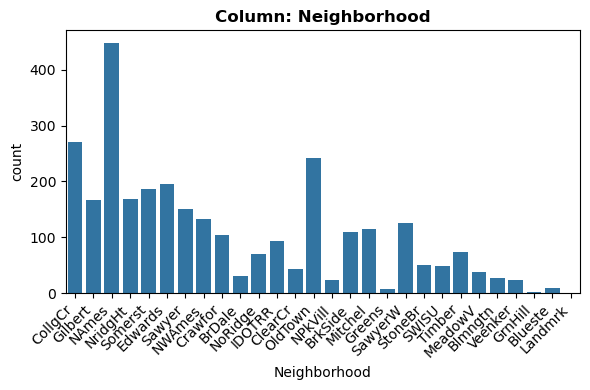

- NaN's Found: 0 (0.0%)
- Unique Values: 28
- Most common value: 'NAmes' occurs 448 times (15.14%)
- Not constant or quasi-constant.



**Type:** Categorical (nominal)  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 28 (high)  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Neighborhood – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 234563**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Bldg Type

**Definition:** Type of dwelling (1Fam, 2FmCon, Duplx, TwnhsE, TwnhsI).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


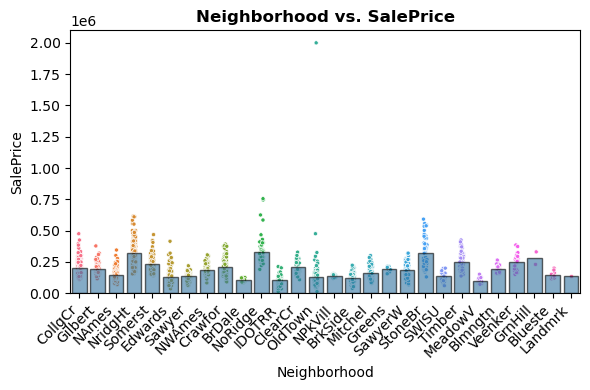

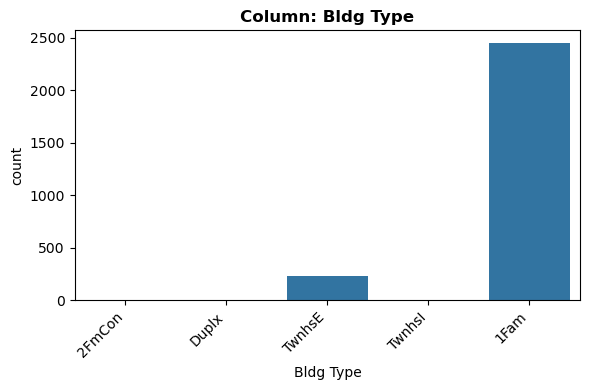

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: '1Fam' occurs 2450 times (82.8%)
- Not constant or quasi-constant.



**Type:** Categorical (nominal)  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 5  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Bldg Type – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 66730**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## House Style

**Definition:** Style of dwelling (1Story, 2Story, 1.5Fin, 1.5Unf, etc.).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


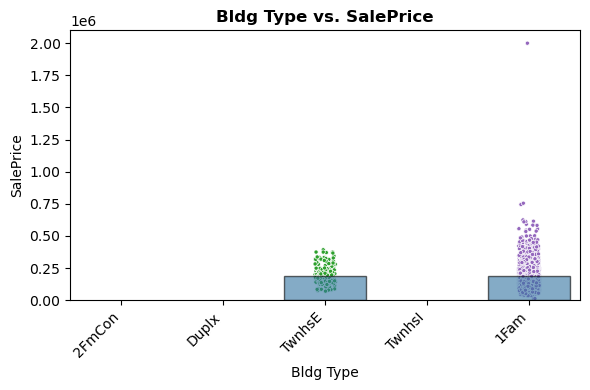

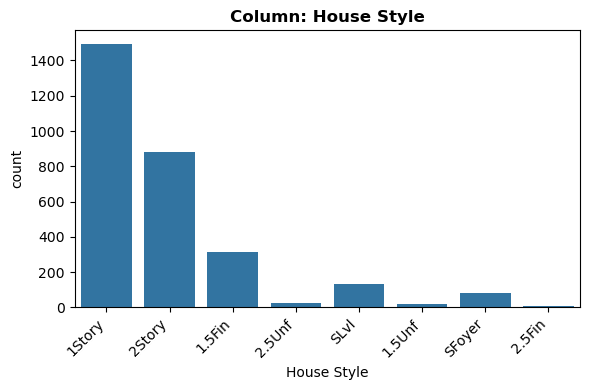

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '1Story' occurs 1496 times (50.56%)
- Not constant or quasi-constant.



**Type:** Categorical (nominal)  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 8  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### House Style – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 110337**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Overall Qual

**Definition:** Overall material and finish quality (1–10, higher is better).

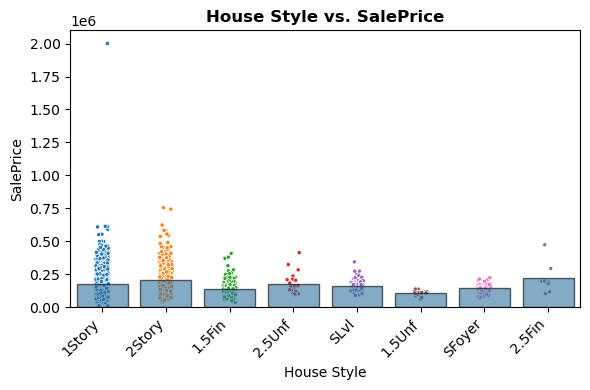

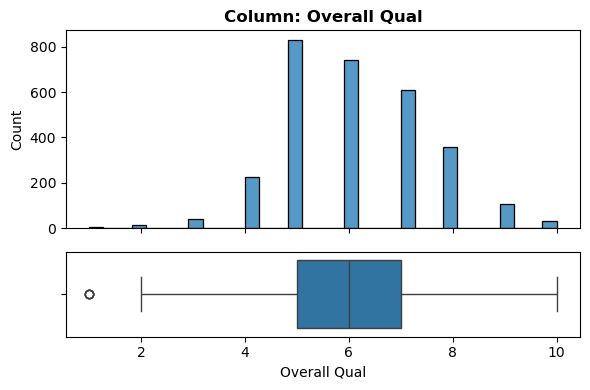

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '5' occurs 830 times (28.05%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 10  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


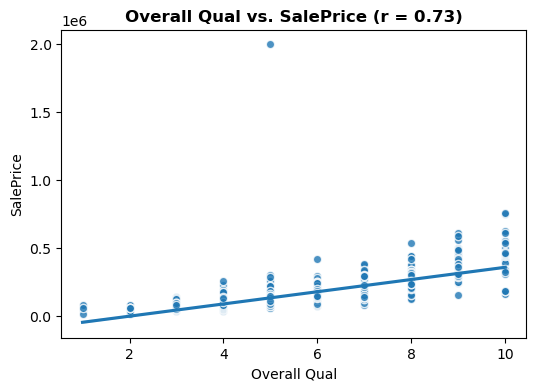


### Overall Qual – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.73**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Overall Cond

**Definition:** Overall condition rating (1–10, higher is better).

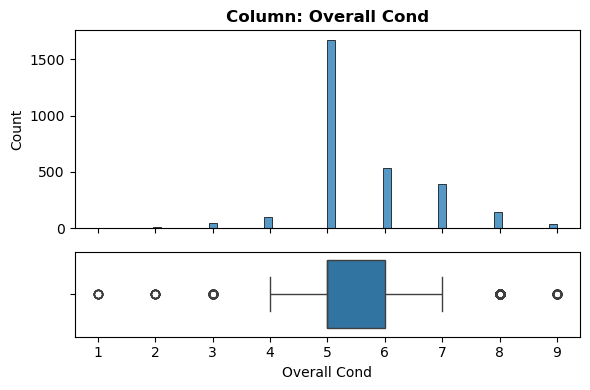

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '5' occurs 1672 times (56.51%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 9  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


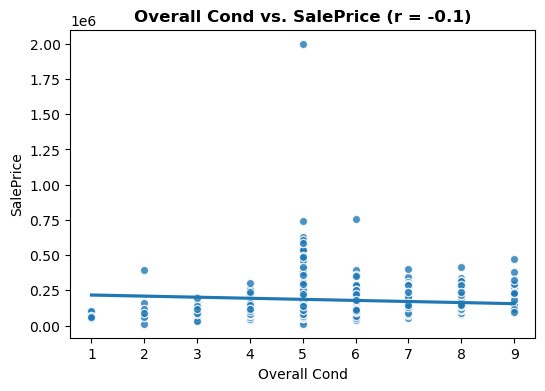


### Overall Cond – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.10**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Year Built

**Definition:** Original construction year.

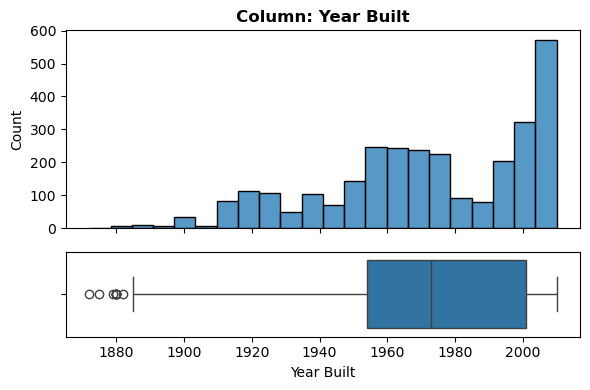

- NaN's Found: 0 (0.0%)
- Unique Values: 118
- Most common value: '2005' occurs 144 times (4.87%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 118  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


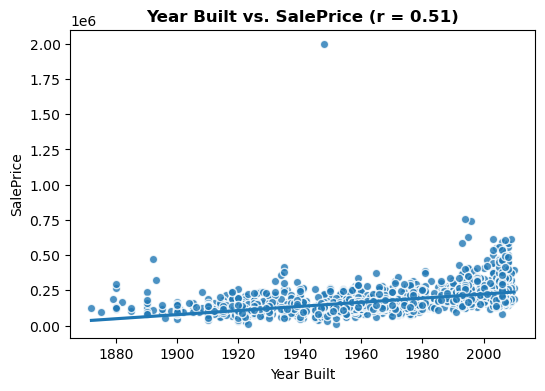


### Year Built – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.51**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Year Remodeled

**Definition:** Remodel year (same as Year Built if never remodeled).

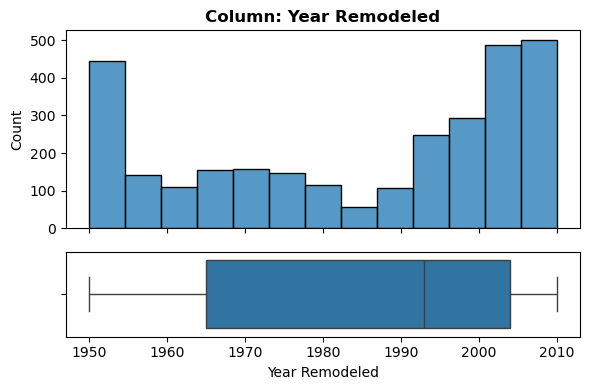

- NaN's Found: 0 (0.0%)
- Unique Values: 61
- Most common value: '1950' occurs 367 times (12.4%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 61  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


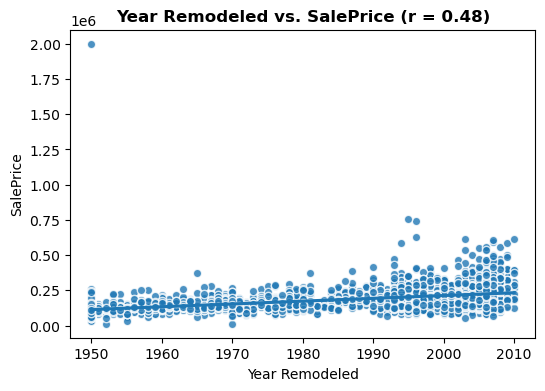


### Year Remodeled – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.48**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Exter Qual

**Definition:** Exterior material quality (Ex, Gd, TA, Fa, Po).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


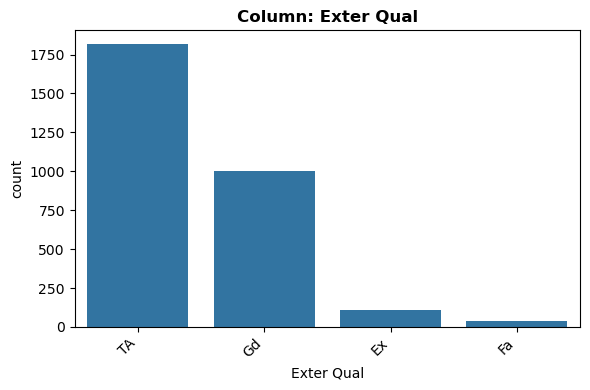

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'TA' occurs 1815 times (61.34%)
- Not constant or quasi-constant.



**Type:** Ordinal  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 4  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Exter Qual – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 287995**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Exter Cond

**Definition:** Present condition of the material on the exterior (Ex, Gd, TA, Fa, Po).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


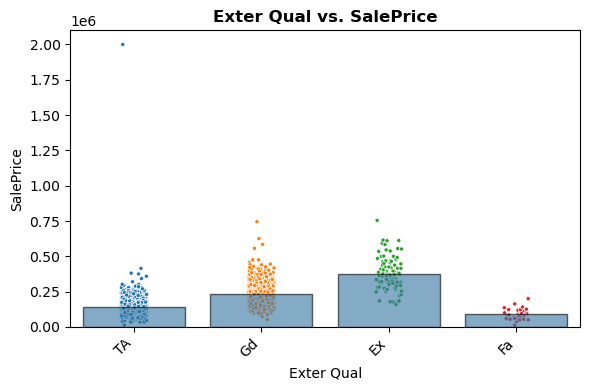

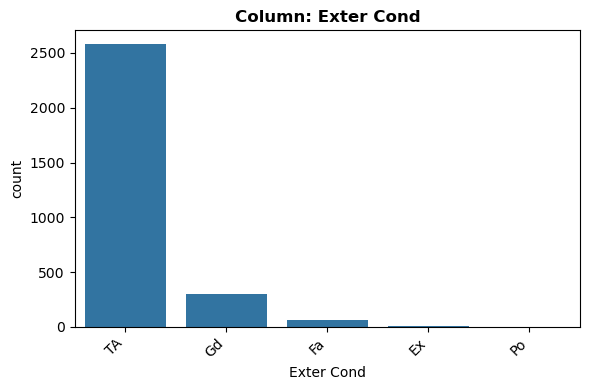

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'TA' occurs 2577 times (87.09%)
- Not constant or quasi-constant.



**Type:** Ordinal  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 5  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Exter Cond – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 134833**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Bsmt Unf Sqft

**Definition:** Unfinished basement square feet.

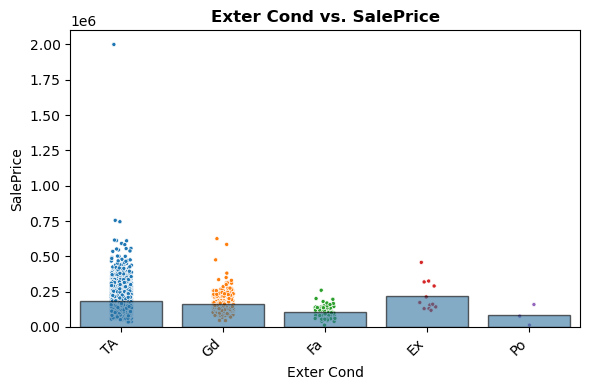

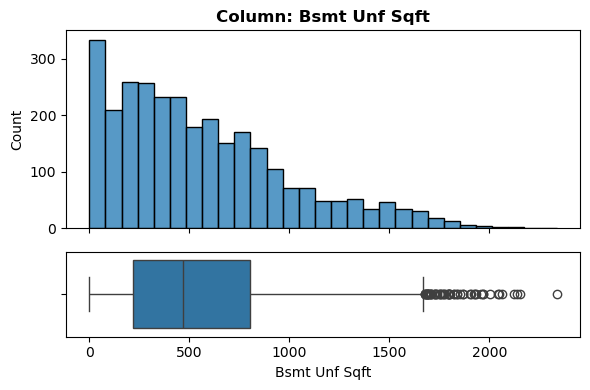

- NaN's Found: 1 (0.03%)
- Unique Values: 1137
- Most common value: '0.0' occurs 244 times (8.25%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 1 (0.03%)  
**Null Handling Suggestion:** Impute (median). If skew is low, mean is acceptable.  
**Constant/Quasi-constant?** No  
**Cardinality:** 1137  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


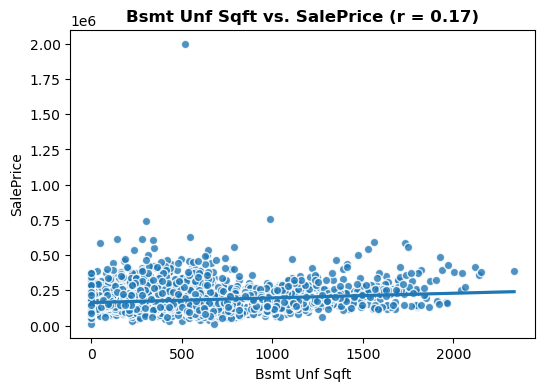


### Bsmt Unf Sqft – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.17**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Total Bsmnt Sqft

**Definition:** Total basement area in square feet.

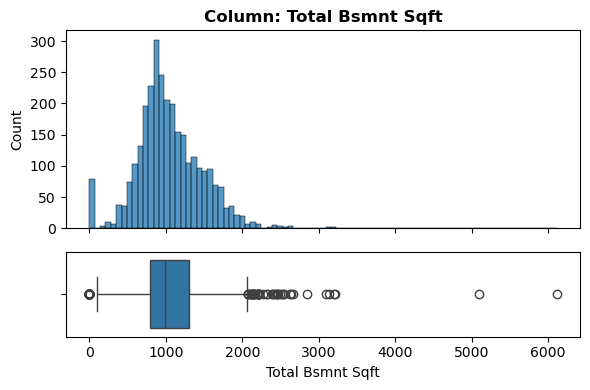

- NaN's Found: 1 (0.03%)
- Unique Values: 1058
- Most common value: '0.0' occurs 79 times (2.67%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 1 (0.03%)  
**Null Handling Suggestion:** Impute (median). If skew is low, mean is acceptable.  
**Constant/Quasi-constant?** No  
**Cardinality:** 1058  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


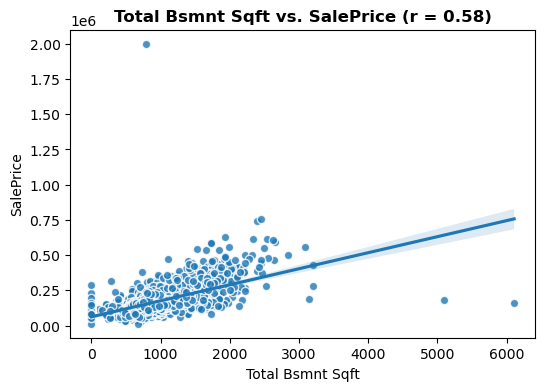


### Total Bsmnt Sqft – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.58**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Central Air

**Definition:** Central air conditioning (Y/N).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


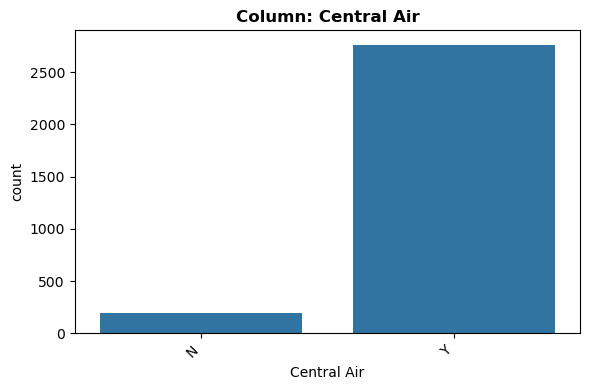

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Y' occurs 2762 times (93.34%)
- Not constant or quasi-constant.



**Type:** Categorical (nominal)  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 2  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Central Air – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 85290**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Living Area Sqft

**Definition:** Above ground living area (Gr Liv Area) in square feet.

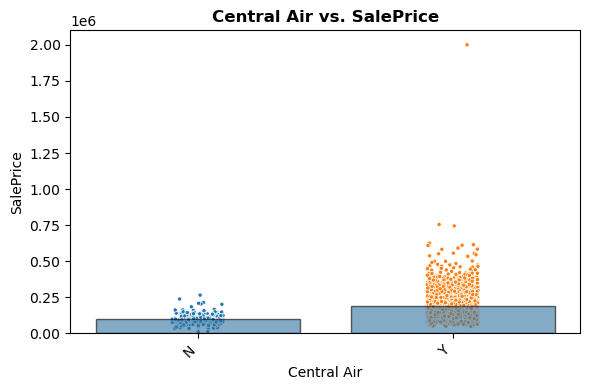

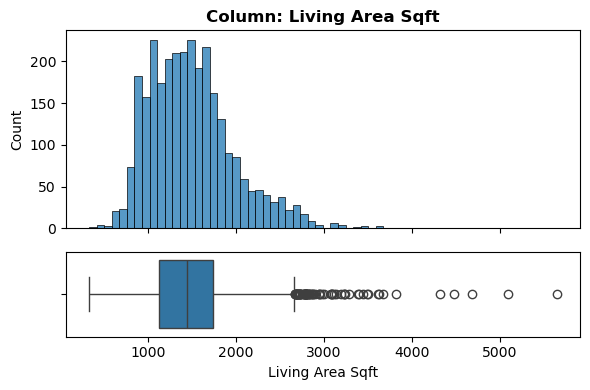

- NaN's Found: 0 (0.0%)
- Unique Values: 1292
- Most common value: '864' occurs 41 times (1.39%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 1292  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


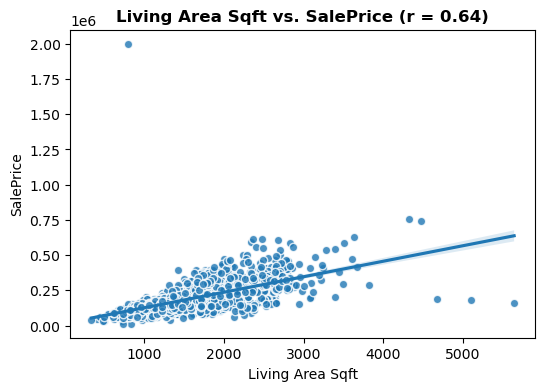


### Living Area Sqft – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.64**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Bsmt Full Bath

**Definition:** Basement full bathrooms.

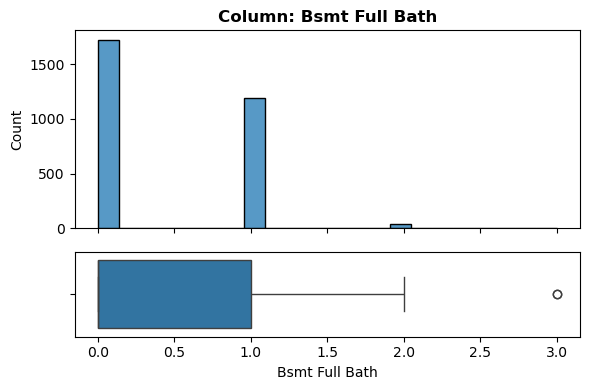

- NaN's Found: 2 (0.07%)
- Unique Values: 4
- Most common value: '0.0' occurs 1723 times (58.23%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 2 (0.07%)  
**Null Handling Suggestion:** Impute (median). If skew is low, mean is acceptable.  
**Constant/Quasi-constant?** No  
**Cardinality:** 4  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


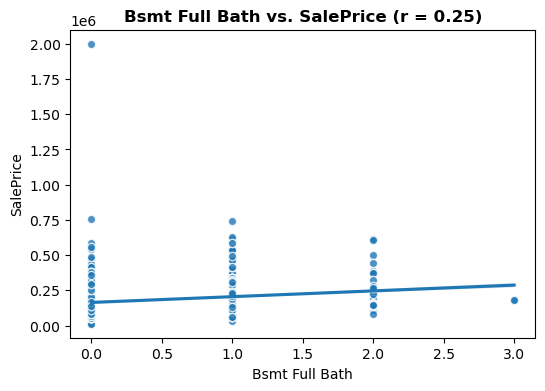


### Bsmt Full Bath – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.25**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Bsmt Half Bath

**Definition:** Basement half bathrooms.

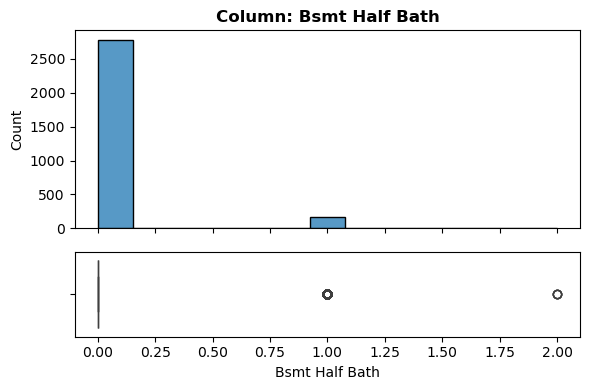

- NaN's Found: 2 (0.07%)
- Unique Values: 3
- Most common value: '0.0' occurs 2780 times (93.95%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 2 (0.07%)  
**Null Handling Suggestion:** Impute (median). If skew is low, mean is acceptable.  
**Constant/Quasi-constant?** No  
**Cardinality:** 3  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


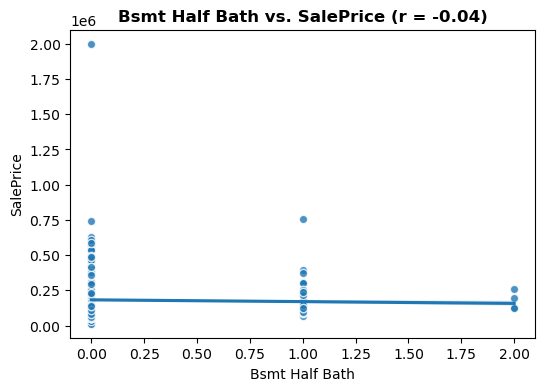


### Bsmt Half Bath – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.04**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Full Bath

**Definition:** Full bathrooms above grade.

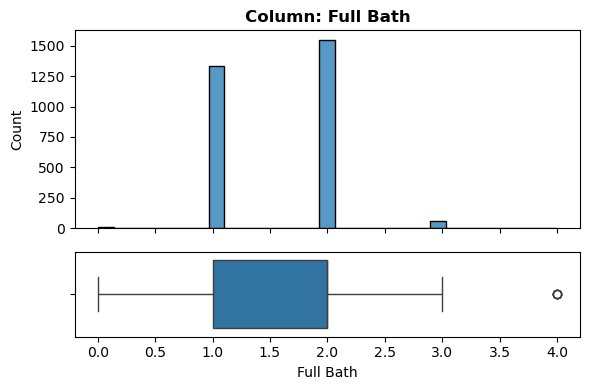

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: '2' occurs 1548 times (52.31%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 5  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


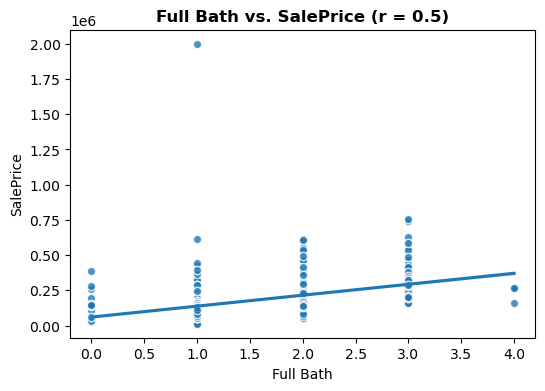


### Full Bath – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.50**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Half Bath

**Definition:** Half bathrooms above grade.

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


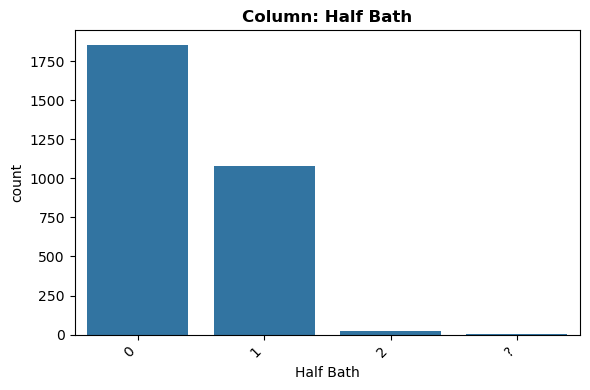

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '0' occurs 1855 times (62.69%)
- Not constant or quasi-constant.



**Type:** Categorical (nominal)  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 4  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Half Bath – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 48716**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Bedroom

**Definition:** Bedrooms above basement level.

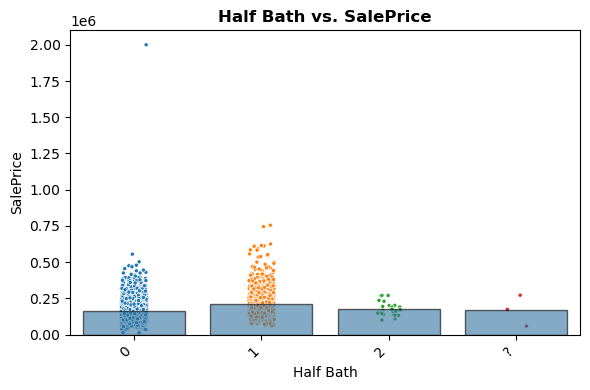

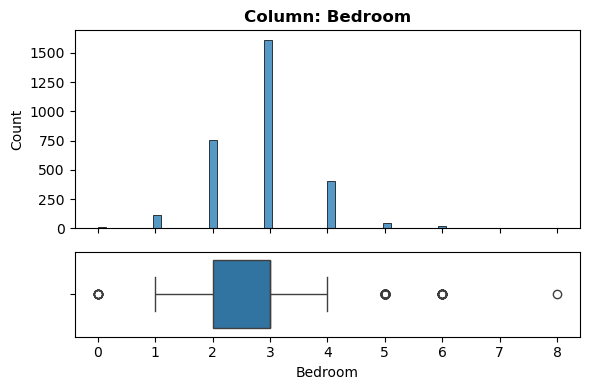

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '3' occurs 1612 times (54.48%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 8  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


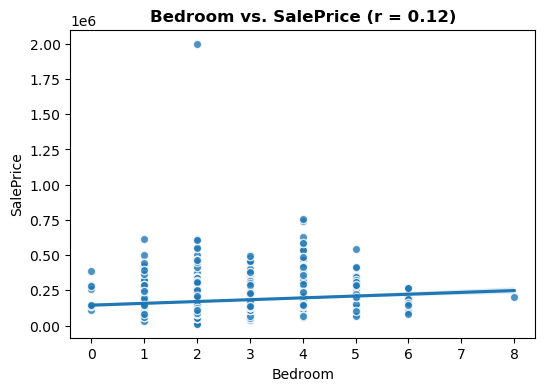


### Bedroom – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.12**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Kitchen

**Definition:** Kitchens above grade.

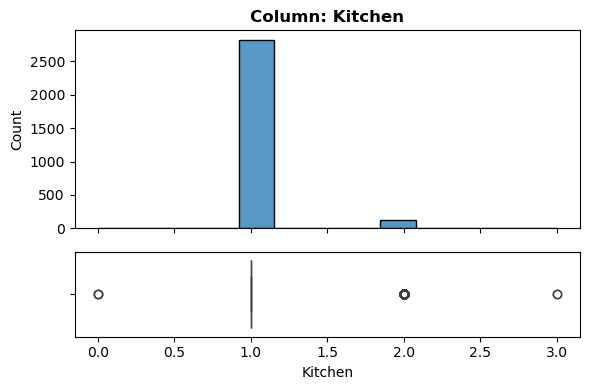

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '1' occurs 2824 times (95.44%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 4  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


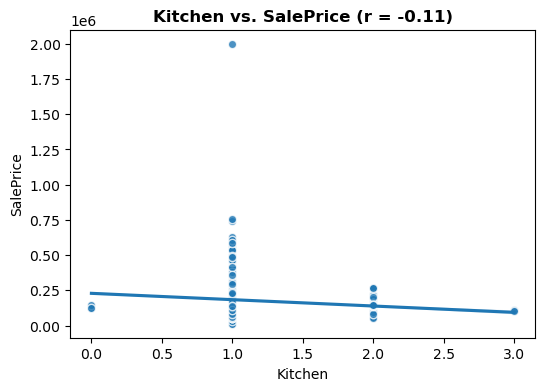


### Kitchen – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.11**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Total Rooms

**Definition:** Total rooms above grade (excludes bathrooms).

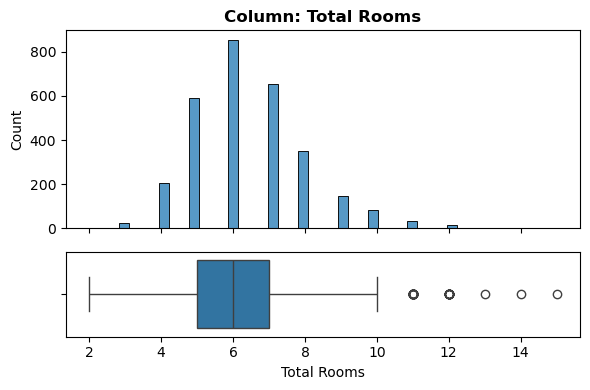

- NaN's Found: 0 (0.0%)
- Unique Values: 14
- Most common value: '6' occurs 854 times (28.86%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 14  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


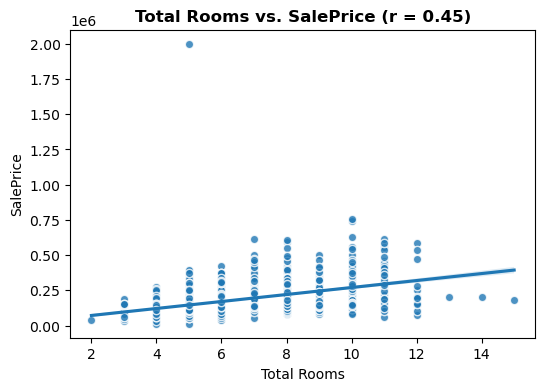


### Total Rooms – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.45**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Garage Type

**Definition:** Garage location (2Types, Attchd, Basment, BuiltIn, CarPort, Detchd).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


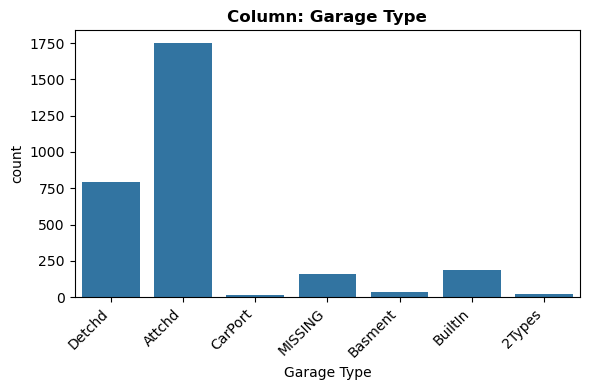

- NaN's Found: 157 (5.31%)
- Unique Values: 7
- Most common value: 'Attchd' occurs 1750 times (59.14%)
- Not constant or quasi-constant.



**Type:** Categorical (nominal)  
**Nulls:** 157 (5.31%)  
**Null Handling Suggestion:** Impute (mode = 'Attchd'). If you prefer explicit missingness, use 'MISSING'.  
**Constant/Quasi-constant?** No  
**Cardinality:** 6  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Garage Type – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 143777**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Garage Yr Blt

**Definition:** Year garage was built.

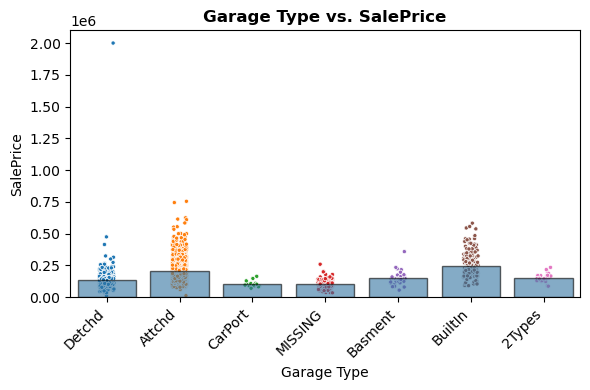

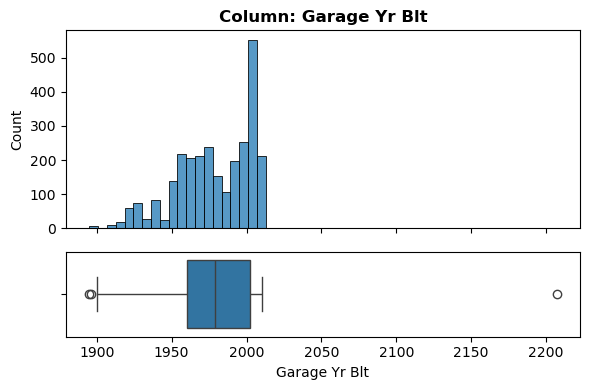

- NaN's Found: 159 (5.37%)
- Unique Values: 103
- Most common value: 'nan' occurs 159 times (5.37%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 159 (5.37%)  
**Null Handling Suggestion:** Impute (median). If skew is low, mean is acceptable.  
**Constant/Quasi-constant?** No  
**Cardinality:** 103  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


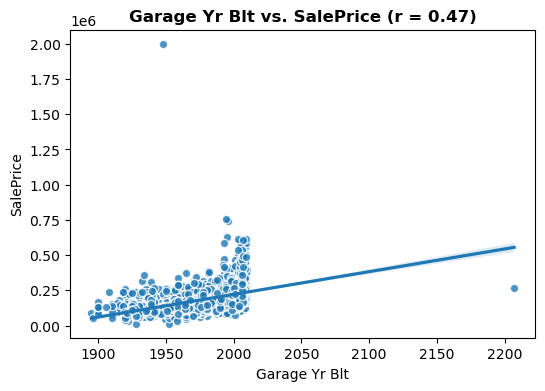


### Garage Yr Blt – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.47**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Garage Cars

**Definition:** Garage capacity in car count.

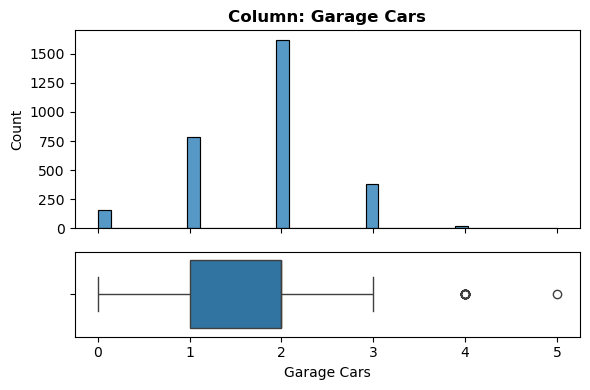

- NaN's Found: 1 (0.03%)
- Unique Values: 6
- Most common value: '2.0' occurs 1620 times (54.75%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 1 (0.03%)  
**Null Handling Suggestion:** Impute (median). If skew is low, mean is acceptable.  
**Constant/Quasi-constant?** No  
**Cardinality:** 6  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


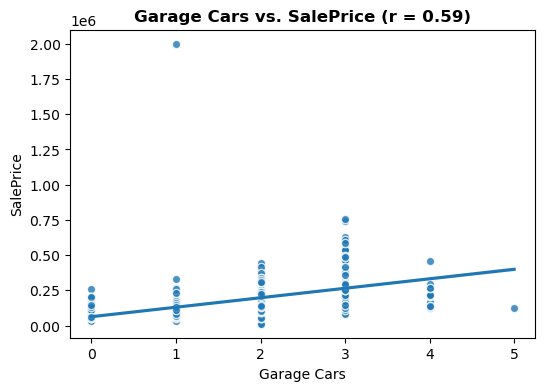


### Garage Cars – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.59**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Garage Area

**Definition:** Garage size in square feet.

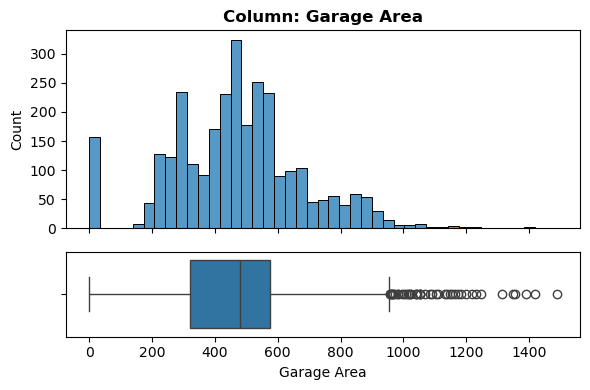

- NaN's Found: 1 (0.03%)
- Unique Values: 603
- Most common value: '0.0' occurs 157 times (5.31%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 1 (0.03%)  
**Null Handling Suggestion:** Impute (median). If skew is low, mean is acceptable.  
**Constant/Quasi-constant?** No  
**Cardinality:** 603  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


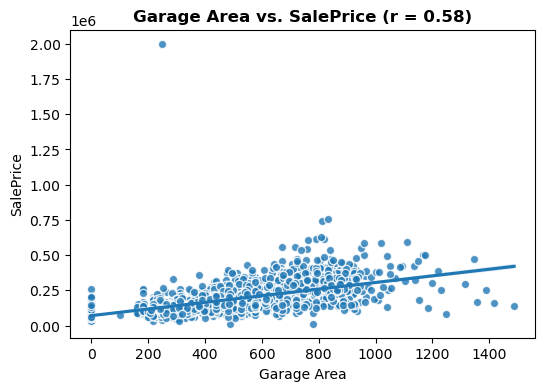


### Garage Area – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.58**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Garage Qual

**Definition:** Garage quality (Ex, Gd, TA, Fa, Po).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


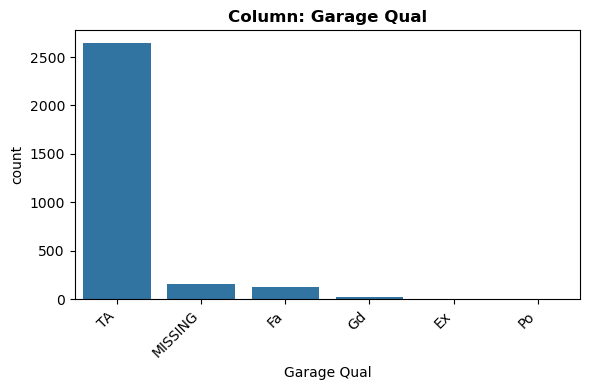

- NaN's Found: 159 (5.37%)
- Unique Values: 6
- Most common value: 'TA' occurs 2643 times (89.32%)
- Not constant or quasi-constant.



**Type:** Ordinal  
**Nulls:** 159 (5.37%)  
**Null Handling Suggestion:** Impute (mode = 'TA'). If you prefer explicit missingness, use 'MISSING'.  
**Constant/Quasi-constant?** No  
**Cardinality:** 5  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Garage Qual – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 154892**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Garage Cond

**Definition:** Garage condition (Ex, Gd, TA, Fa, Po).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


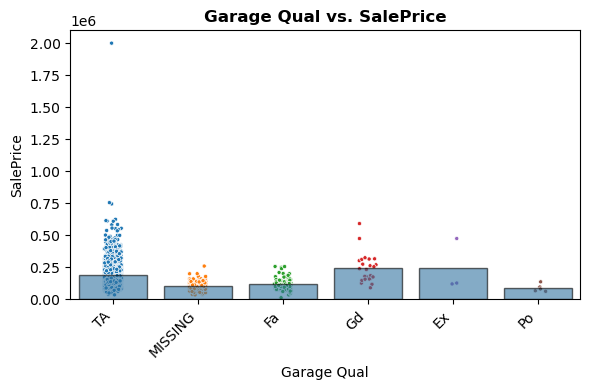

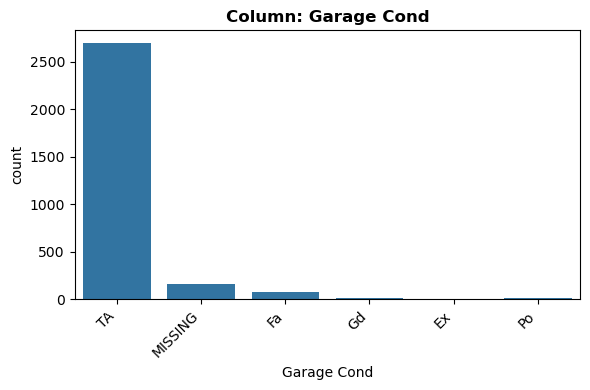

- NaN's Found: 159 (5.37%)
- Unique Values: 6
- Most common value: 'TA' occurs 2693 times (91.01%)
- Not constant or quasi-constant.



**Type:** Ordinal  
**Nulls:** 159 (5.37%)  
**Null Handling Suggestion:** Impute (mode = 'TA'). If you prefer explicit missingness, use 'MISSING'.  
**Constant/Quasi-constant?** No  
**Cardinality:** 5  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Garage Cond – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 99208**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Paved Drive

**Definition:** Paved driveway (Y, P, N).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


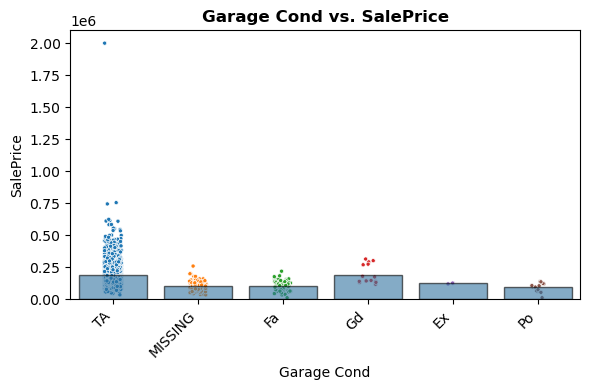

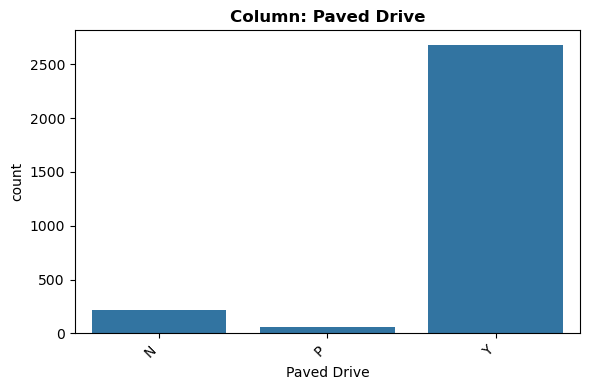

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Y' occurs 2681 times (90.6%)
- Not constant or quasi-constant.



**Type:** Ordinal  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 3  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Paved Drive – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 81386**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Fence

**Definition:** Fence quality (GdPrv, MnPrv, GdWo, MnWw, NA).

C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


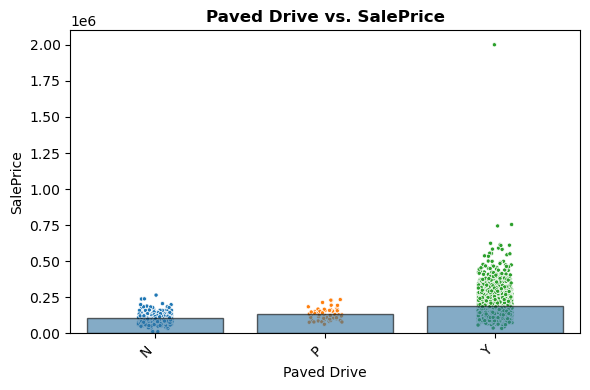

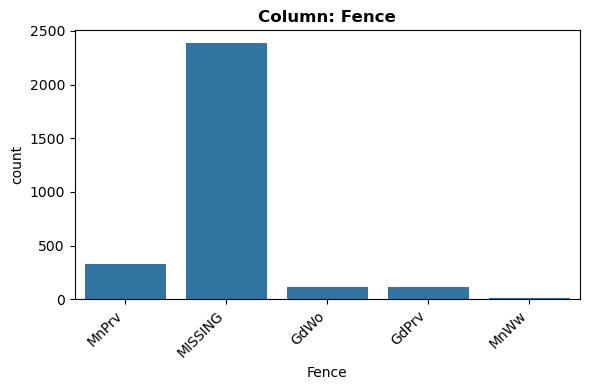

- NaN's Found: 2385 (80.6%)
- Unique Values: 5
- Most common value: 'MISSING' occurs 2385 times (80.6%)
- Not constant or quasi-constant.



**Type:** Ordinal  
**Nulls:** 2385 (80.6%)  
**Null Handling Suggestion:** Impute (mode = 'MnPrv'). If you prefer explicit missingness, use 'MISSING'.  
**Constant/Quasi-constant?** No  
**Cardinality:** 4  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


C:\Users\hutha\Documents\AXSOS\Data Visualization\EDA_functions.py:153: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



### Fence – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Mean(target) range ≈ 42745**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Month

**Definition:** Month of sale (1–12).

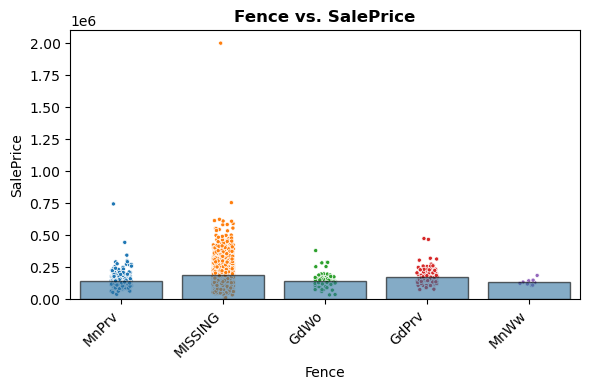

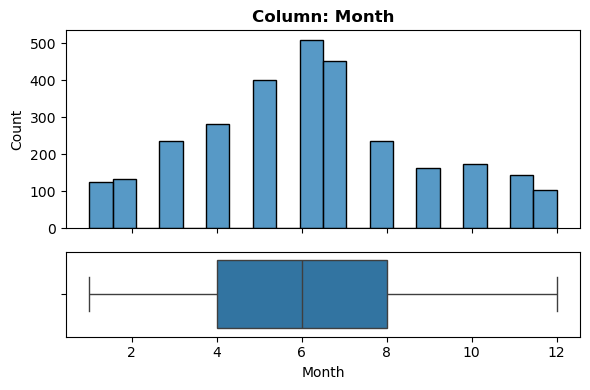

- NaN's Found: 0 (0.0%)
- Unique Values: 12
- Most common value: '6' occurs 510 times (17.24%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 12  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


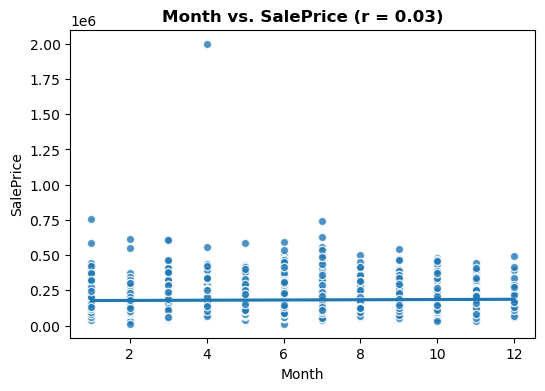


### Month – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.03**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


## Year

**Definition:** Year of sale.

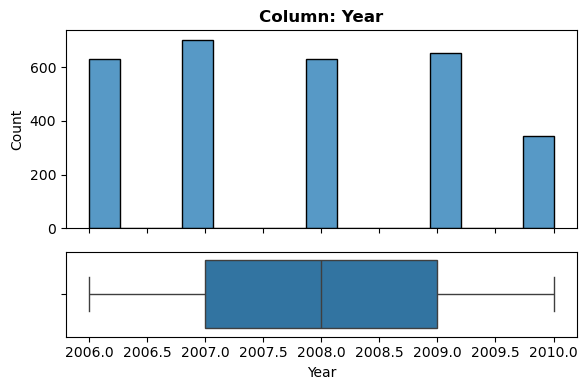

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: '2007' occurs 702 times (23.72%)
- Not constant or quasi-constant.



**Type:** Numeric  
**Nulls:** 0 (0.0%)  
**Null Handling Suggestion:** No action (no nulls).  
**Constant/Quasi-constant?** No  
**Cardinality:** 5  
**Known before target?** Yes  
**Business-case exclusion?** None apparent.


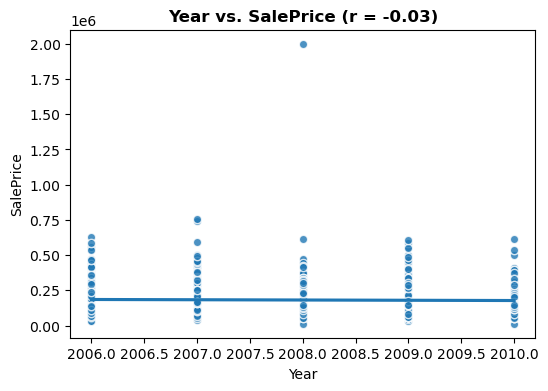


### Year – Relation to Target
- **Expected Predictor (business)?** _Add your reasoning here._  
- **Does it appear predictive (plot)?** Hint → **Numeric corr |r|≈ 0.03**  
- **Notes:** _Outliers? rare categories? non-linear patterns?_


In [100]:
for c in df.columns:
    if c == 'SalePrice':
        continue
    inspect_feature(df, c, target='SalePrice')
